In [78]:
# Lab 7 Learning rate and Evaluation
import warnings
warnings.simplefilter("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [79]:
tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10
mnist

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f82c92b1320>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f82aa21aa58>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f8288d3ecc0>)

In [80]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [81]:
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 1
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

import pandas as pd

data_x = []
data_y = []

batch_xs: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
cost_val: 14.718533
avg_cost: 0.026760968295010654
batch_xs: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
cost_val: 15.10933
avg_cost: 0.05423247770829634
batch_xs: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
cost_val: 13.1023245
avg_cost: 0.07805488586425781
batch_xs: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
cost_val: 12.934185
avg_cost: 0.10157158591530539
batch_xs: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0.

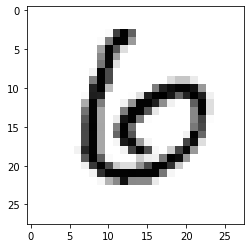

In [82]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            print("batch_xs:", batch_xs)
            data_x = pd.DataFrame(batch_xs)
            data_y = pd.DataFrame(batch_ys)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            print("cost_val:", cost_val)
            avg_cost += cost_val / num_iterations
            print("avg_cost:", avg_cost)
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    r = 11
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()

In [83]:
import numpy as np
index = 3
print(data_x.loc[index])
data = data_x.loc[index]
for i in range(28):
    for j in range(28):
        if(data[(i*28)+j] != 0):
            print("1", end=" ")
        else: 
            print("0", end=" ")
    print("")
print(np.argmax(data_y.loc[index]))

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
779    0.0
780    0.0
781    0.0
782    0.0
783    0.0
Name: 3, Length: 784, dtype: float32
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 

Label:  [7]
Prediction:  [1]
Label:  [2]
Prediction:  [0]
Label:  [1]
Prediction:  [8]
Label:  [0]
Prediction:  [8]
Label:  [4]
Prediction:  [5]
Label:  [1]
Prediction:  [8]
Label:  [4]
Prediction:  [9]
Label:  [9]
Prediction:  [8]
Label:  [5]
Prediction:  [0]
Label:  [9]
Prediction:  [9]


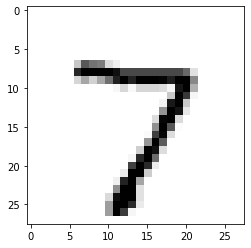

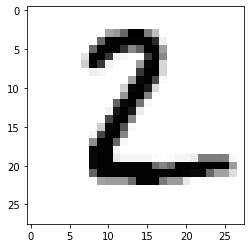

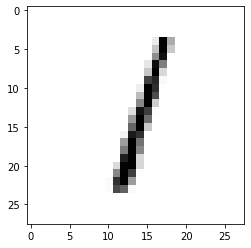

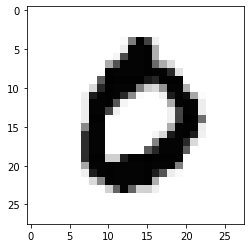

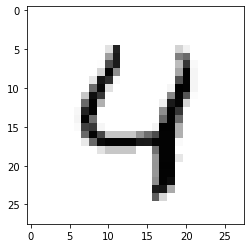

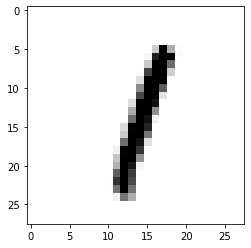

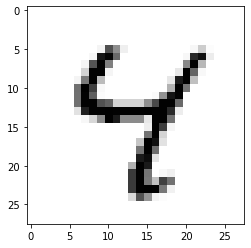

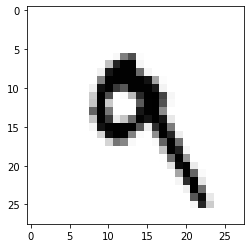

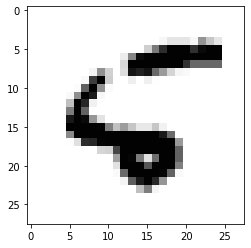

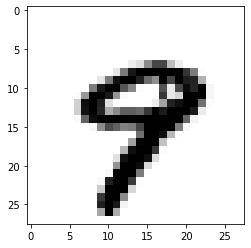

In [84]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for i in range(10):    
            r = i
            print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
            print(
                "Prediction: ",
                sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
            )

            plt.imshow(
                mnist.test.images[r : r + 1].reshape(28, 28),
                cmap="Greys",
                interpolation="nearest",
            )
            plt.show()

In [85]:
with tf.Session() as sess.as_default:
    t = tf.constant([1,2,3,4])
    print(tf.shape(t))

Tensor("Shape_5:0", shape=(1,), dtype=int32)


In [76]:
with tf.Session() as sess.as_default:
    t = tf.constant([1,2,3,4])
    print(tf.shape(t))

Tensor("Shape_4:0", shape=(1,), dtype=int32)
